In [1]:
#特征评价关键代码
#Feature reduce - Option 1: corr with Product_RON_loss
import os
import matplotlib . pyplot as plt
import numpy as np
import pandas as pd

table_path = "../data/data_num_325_fea_163.xlsx"
pearsonr_table_path = "../data/data_num_325_fea_30_pearsonr.xlsx"

In [2]:
data = pd.read_excel(table_path,index_col = 0)
y = data['Product_RON_loss']
del data['Product_RON_loss']

In [3]:
data.describe()

,Raw_S_content,Raw_RON,Raw_Saturated_hydrocarbon,Raw_Aromatics,Raw_Bromine_value,Raw_Density,Product_S_content,Spent_C,Spent_S,Recycle_C,...,S-ZORB.TE_1102.DACA,S-ZORB.AT-0001.DACA.PV,S-ZORB.AT-0003.DACA.PV,S-ZORB.FT_1204.DACA.PV,S-ZORB.FT_5102.DACA.PV,S-ZORB.CAL.LEVEL.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1504.DACA.PV
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,229.548904,89.733538,52.676228,21.949782,54.526661,726.755265,3.800615,2.913287,8.063265,1.452198,...,426.683182,2.547025,1.131551,51.744081,39.363996,1694.502170,4843.993930,138.497321,2190.862732,2409.550662
std,65.752227,0.889764,4.584314,1.823616,6.818416,4.262181,1.088180,1.534346,2.132002,0.869304,...,1.620979,2.684052,1.147907,17.834025,38.974031,4967.505040,2359.134691,128.581578,418.047777,452.316109
min,57.000000,87.200000,43.240000,16.822222,36.520000,715.100000,3.200000,1.010000,2.940000,0.250000,...,421.701460,0.498255,0.447884,0.889900,0.000000,-4269.455900,0.000000,0.000000,979.564940,1222.663100
25%,185.000000,89.200000,49.610000,20.690000,48.750000,724.200000,3.200000,1.850000,6.990000,0.933333,...,426.178457,0.534488,0.464989,38.945485,0.000000,78.928243,4215.424100,0.000000,1887.742875,2329.794550
50%,240.285714,89.800000,53.250000,21.890000,53.980000,726.300000,3.200000,2.390000,8.400000,1.280000,...,427.171300,0.555710,0.472675,51.672012,64.004581,80.502553,5094.966775,142.936557,2177.557700,2538.538450
75%,271.428571,90.300000,56.100000,23.300000,60.190000,729.500000,4.100000,3.450000,9.370000,1.620000,...,427.171300,5.123928,1.391713,62.806419,67.543727,83.893701,6129.741900,195.923272,2496.749950,2702.628700
max,392.000000,91.700000,63.400000,26.200000,70.500000,738.700000,7.700000,7.810000,14.310000,4.360000,...,431.377010,7.155496,4.493657,96.921348,167.076795,17700.150500,11320.456750,552.153825,3334.904725,3104.564825


In [4]:
features = data.columns.values.tolist()

In [5]:
# CV ranking
cv_feature_importance = [( column, np. std ( data [column])/abs(np.mean(data[column]))) for column in features ]
cv_feature_importance.sort (key=lambda x: x [1], reverse =True)
cv_sorted_attrs = [item[0] for item in cv_feature_importance ]
cv_ranking = [ cv_sorted_attrs . index(x) + 1 for x in features ]
print ("# CV result")
# print (cv_ranking)
# print ( cv_feature_importance )

# CV result


In [6]:
cv_feature_sort = []
cv_feature_score = []
for i in range(0, len(cv_feature_importance)):
    cv_feature_sort.append(cv_feature_importance[i][0])
    cv_feature_score.append(cv_feature_importance[i][1])

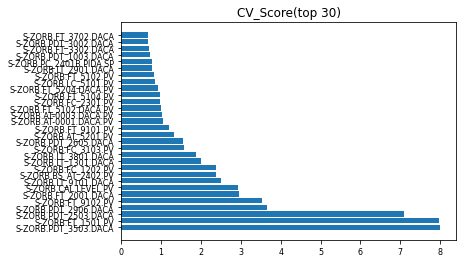

In [7]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
plt.title('CV_Score(top 30)')
plt.rcParams['figure.figsize'] = (10, 8.0) # 设置figure_size尺寸
plt.barh(cv_feature_sort[0:30], cv_feature_score[0:30],tick_label = cv_feature_sort[0:30])

plt.tick_params(labelsize=8)
plt.show()

In [8]:
#y_values = data [ target ]
from scipy.stats import pearsonr
y_values = y
pearsonr_feature_impotance = [( column, pearsonr ( data[column], y_values) [0]) for column in features ]
pearsonr_feature_impotance . sort (key=lambda x: abs(x [1]) , reverse =True)
pearson_sorted_attrs = [item[0] for item in pearsonr_feature_impotance ]
pearson_ranking = [ pearson_sorted_attrs . index(x) + 1 for x in features ]
print ("# Pearson result")
# print (pearson_ranking)
# print ( pearsonr_feature_impotance )

# Pearson result


In [9]:
pearsonr_feature_impotance[0][0]

'S-ZORB.LC_5101.PV'

In [10]:
pearsonr_feature_sort = []
pearsonr_feature_score = []
for i in range(0, len(pearsonr_feature_impotance)):
    pearsonr_feature_sort.append(pearsonr_feature_impotance[i][0])
    pearsonr_feature_score.append(pearsonr_feature_impotance[i][1])

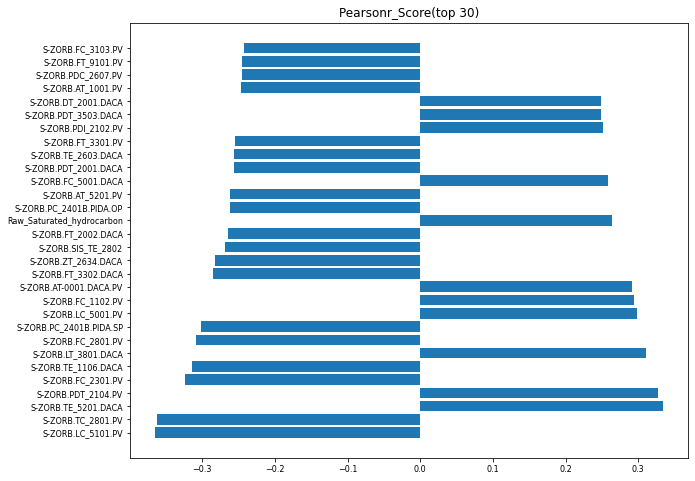

In [11]:
plt.title('Pearsonr_Score(top 30)')
plt.rcParams['figure.figsize'] = (10, 8.0) # 设置figure_size尺寸
plt.barh(pearsonr_feature_sort[0:30], pearsonr_feature_score[0:30],tick_label = pearsonr_feature_sort[0:30])

plt.tick_params(labelsize=8)
plt.show()

In [12]:
X_pearsonr = data[pearsonr_feature_sort[0:30]]
X_pearsonr

,S-ZORB.LC_5101.PV,S-ZORB.TC_2801.PV,S-ZORB.TE_5201.DACA,S-ZORB.PDT_2104.PV,S-ZORB.FC_2301.PV,S-ZORB.TE_1106.DACA,S-ZORB.LT_3801.DACA,S-ZORB.FC_2801.PV,S-ZORB.PC_2401B.PIDA.SP,S-ZORB.LC_5001.PV,...,S-ZORB.PDT_2001.DACA,S-ZORB.TE_2603.DACA,S-ZORB.FT_3301.PV,S-ZORB.PDI_2102.PV,S-ZORB.PDT_3503.DACA,S-ZORB.DT_2001.DACA,S-ZORB.AT_1001.PV,S-ZORB.PDC_2607.PV,S-ZORB.FT_9101.PV,S-ZORB.FC_3103.PV
0,49.916519,272.367985,44.920345,101.290580,0.000000,133.680820,1.246513,647.752380,0.184742,55.011075,...,21.702477,369.347225,92.388075,31.211968,0.103916,93.428016,187.144500,8.778104,2.113980,0.910808
1,49.955209,281.072710,49.961387,101.544925,0.000000,133.824785,0.992477,651.821920,0.184742,54.996157,...,21.222562,379.786200,74.366110,31.461969,0.010563,94.420340,187.144500,8.951355,0.462973,0.000000
2,50.215176,272.924330,49.754584,101.618320,0.000000,133.459220,1.089546,650.747150,0.184742,55.021892,...,21.399066,401.446240,146.156760,31.339997,0.052262,94.729605,187.144500,6.901717,0.219469,0.000000
3,49.877925,269.141545,50.039984,105.029760,0.000000,136.293350,1.364642,652.669055,0.184742,55.041748,...,21.194405,375.156435,88.360856,31.033443,0.039926,96.880334,187.144500,9.122255,2.465471,0.459207
4,49.900563,267.033390,49.900836,105.937455,0.000000,136.403490,1.034412,649.340920,0.184742,55.026846,...,21.199750,399.719460,186.439789,30.826894,0.046375,97.991173,187.144500,8.924765,0.214853,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,598.017788,290.046320,44.431741,52.717846,126.887476,150.675582,0.025413,819.708705,1.207479,50.009071,...,35.332611,475.033498,575.819775,18.169647,0.721264,47.000323,225.020775,16.673572,6.020366,4.798747
321,568.550955,286.308350,47.705298,54.426241,152.302147,149.727317,0.077742,820.912883,0.988269,49.977052,...,35.341335,452.243055,371.761690,18.356451,0.810553,48.510221,224.013005,16.673572,5.998378,2.092309
322,626.531005,288.879765,48.597363,54.764742,144.639408,149.604590,-0.014480,818.246100,1.167349,50.104367,...,35.353873,468.798245,484.850683,18.477197,-0.033767,48.867726,213.336115,16.673572,6.054638,6.524874
323,629.323360,284.760735,47.845586,55.948335,59.778301,150.087507,-0.094022,820.887623,1.147691,50.037513,...,35.454236,476.055835,533.892527,18.626541,-0.033767,50.020782,208.649452,16.673572,6.200266,6.410446


In [13]:
X_pearsonr['Product_RON_loss'] = y
X_pearsonr.to_excel(pearsonr_table_path)
print("save reduced features to", pearsonr_table_path)

<ipython-input-13-1fd6d834323f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_pearsonr['Product_RON_loss'] = y


save reduced features to ../data/data_num_325_fea_30_pearsonr.xlsx
